# 1. İş Problemi ve Veri Seti Hikayesi

## İş Problemi

FLO müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor.

Buna yönelik olarak müşterilerin davranışları tanımlanacak ve bu davranış öbeklenmelerine göre gruplar oluşturulacak..


## Veri Seti Hikayesi

Veri seti son alışverişlerini 2020 - 2021 yıllarında OmniChannel(hem online hem offline alışveriş yapan) olarak yapan müşterilerin geçmiş alışveriş davranışlarından
elde edilen bilgilerden oluşmaktadır.

## Veri Seti Değişkenleri

- master_id: Eşsiz müşteri numarası
- order_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile, Offline)
- last_order_channel : En son alışverişin yapıldığı kanal
- first_order_date : Müşterinin yaptığı ilk alışveriş tarihi
- last_order_date : Müşterinin yaptığı son alışveriş tarihi
- last_order_date_online : Muşterinin online platformda yaptığı son alışveriş tarihi
- last_order_date_offline : Muşterinin offline platformda yaptığı son alışveriş tarihi
- order_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı
- order_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı
- customer_value_total_ever_offline : Müşterinin offline alışverişlerinde ödediği toplam ücret
- customer_value_total_ever_online : Müşterinin online alışverişlerinde ödediği toplam ücret
- interested_in_categories_12 : Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi


# 2. Keşifçi Veri Analizi(EDA-Exploratory Data Analysis)

In [9]:
import datetime as dt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width',1000)

In [10]:
import numpy as np

In [11]:
df_ = pd.read_csv("flo_data_20k.csv")

In [12]:
df = df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


### İlk On Gözlem

In [14]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.00,2.00,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.00,1.00,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.00,1.00,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.00,2.00,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.00,1.00,69.98,95.98,"[KADIN, AKTIFSPOR]"


### Veri Seti Hakkında Genel Bilgiler

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

### Veri Setindeki Betimsel İstatistikler

#### Sayısal Değişkenlerin Betimsel İstatistikleri

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.00,3.11,4.23,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.00,1.91,2.06,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.00,253.92,301.53,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.00,497.32,832.60,12.99,149.98,286.46,578.44,45220.13


#### Sayısal Olmayan Değişkenlerin Betimsel İstatistikleri

In [21]:
df.describe(include=[object], exclude=[np.number]).T

,count,unique,top,freq
master_id,19945,19945,cc294636-19f0-11eb-8d74-000d3a38a36f,1
order_channel,19945,4,Android App,9495
last_order_channel,19945,5,Android App,6783
first_order_date,19945,2465,2019-02-16,80
last_order_date,19945,366,2021-05-19,205
last_order_date_online,19945,1743,2020-11-27,200
last_order_date_offline,19945,738,2021-05-19,96
interested_in_categories_12,19945,32,[AKTIFSPOR],3464


### Toplam Alışveriş Sayısı ve Toplam Harcama

In [23]:
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

In [24]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

### Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısı ve toplam harcamaların dağılımı

In [26]:
order_channel_groupped = df.groupby("order_channel").agg({"master_id":"count",
                                 "order_num_total":"sum",
                                 "customer_value_total":"sum"})
order_channel_groupped

,master_id,order_num_total,customer_value_total
order_channel,,,
Android App,9495,52269.00,7819062.76
Desktop,2735,10920.00,1610321.46
Ios App,2833,15351.00,2525999.93
Mobile,4882,21679.00,3028183.16


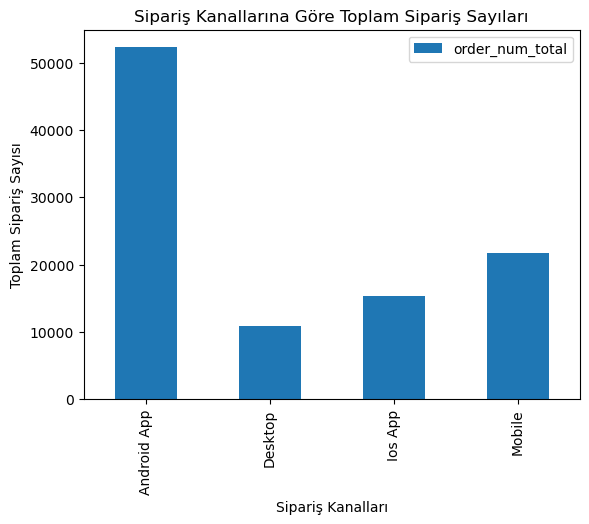

In [27]:
order_channel_groupped.plot(y="order_num_total", 
                            kind="bar", 
                            title="Sipariş Kanallarına Göre Toplam Sipariş Sayıları", 
                            xlabel="Sipariş Kanalları",
                            ylabel="Toplam Sipariş Sayısı");

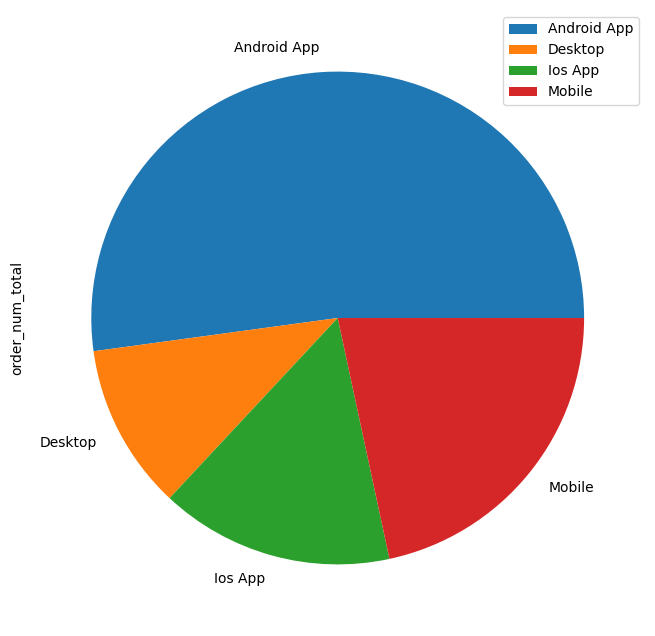

In [28]:
order_channel_groupped.plot(y="order_num_total", kind="pie", figsize=(12,8));

### En Fazla Kazanç Getiren İlk On Müşteri

In [30]:
df.sort_values("customer_value_total", ascending=False)[:10]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.00,1.00,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.00,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.00,1.00,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.00,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.00,3.00,18119.14,2587.20,[AKTIFSPOR],4.00,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.00,1.00,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.00,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.00,2.00,64.97,12038.18,"[ERKEK, KADIN]",20.00,12103.15


### En Fazla sipariş Veren İlk On Müşteri

In [32]:
df.sort_values("order_num_total", ascending=False)[:10]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.00,109.00,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.00,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.00,87.00,8432.25,139.98,[ERKEK],88.00,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.00,81.00,3997.55,242.81,[ERKEK],83.00,4240.36
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.00,74.00,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.00,5184.05
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.00,3.00,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.00,5297.88
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57


# 3. RFM Metriklerinin Hesaplanması

In [34]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [35]:
analysis_date = dt.datetime(2021, 6, 1)

### RFM DataFrame Oluşturma

In [37]:
rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm["recency"] = (analysis_date - df["last_order_date"]).astype("timedelta64[ns]")
rfm["frequency"] = df["order_num_total"]
rfm["monetary"] = df["customer_value_total"]

In [38]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   customer_id  19945 non-null  object         
 1   recency      19945 non-null  timedelta64[ns]
 2   frequency    19945 non-null  float64        
 3   monetary     19945 non-null  float64        
dtypes: float64(2), object(1), timedelta64[ns](1)
memory usage: 623.4+ KB


### RFM Skorlarının Tayin Edilmesi

In [40]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [41]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   customer_id      19945 non-null  object         
 1   recency          19945 non-null  timedelta64[ns]
 2   frequency        19945 non-null  float64        
 3   monetary         19945 non-null  float64        
 4   recency_score    19945 non-null  category       
 5   frequency_score  19945 non-null  category       
 6   monetary_score   19945 non-null  category       
dtypes: category(3), float64(2), object(1), timedelta64[ns](1)
memory usage: 682.5+ KB


In [42]:
rfm.describe(include=["category"], exclude=[np.number, object]).T

,count,unique,top,freq
recency_score,19945,5,5,4111
frequency_score,19945,5,1,3989
monetary_score,19945,5,3,3991


In [43]:
rfm["recency_score"].value_counts()

recency_score
5    4111
3    4007
1    3984
2    3951
4    3892
Name: count, dtype: int64

In [44]:
rfm["frequency_score"].value_counts()

frequency_score
1    3989
2    3989
3    3989
4    3989
5    3989
Name: count, dtype: int64

### RF ve RFM Skorlarının Tayin Edilmesi

In [46]:
rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))

In [47]:
rfm.describe(include=[object], exclude=[np.number, "category"]).T

,count,unique,top,freq
customer_id,19945,19945,cc294636-19f0-11eb-8d74-000d3a38a36f,1
RF_SCORE,19945,25,55,1068
RFM_SCORE,19945,122,555,836


### RF Skorlarının Segment Olarak Tanımlanması

In [49]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [50]:
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

In [80]:
rfm['segment'].value_counts()

segment
hibernating            3604
loyal_customers        3361
at_Risk                3131
potential_loyalists    2938
champions              1932
about_to_sleep         1629
cant_loose             1200
need_attention          823
new_customers           680
promising               647
Name: count, dtype: int64

In [82]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                                           mean count      mean count     mean count
segment                                                                             
about_to_sleep      113 days 18:50:36.464088398  1629      2.40  1629   359.01  1629
at_Risk             241 days 14:33:50.533375920  3131      4.47  3131   646.61  3131
cant_loose                    235 days 10:39:36  1200     10.70  1200  1474.47  1200
champions            17 days 02:33:32.422360248  1932      8.93  1932  1406.63  1932
hibernating         247 days 22:47:16.847946724  3604      2.39  3604   366.27  3604
loyal_customers      82 days 14:16:27.563225231  3361      8.37  3361  1216.82  3361
need_attention      113 days 19:53:17.569866342   823      3.73   823   562.14   823
new_customers        17 days 22:01:24.705882353   680      2.00   680   339.96   680
potential_loyalists  37 days 03:44:28.754254595  2938      3.30  2938   533.18  2938
promising            58 days 22:06:29.489953632   647      2.00   647   335.67   647

# 4. Case İncelemeleri

### Case 1

FLO bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri tercihlerinin üstünde. Bu nedenle markanın
tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak iletişime geçeilmek isteniliyor. Bu müşterilerin sadık  ve
kadın kategorisinden alışveriş yapan kişiler olması planlandı. Müşterilerin id numaralarını csv dosyasına yeni_marka_hedef_müşteri_id.cvs
olarak kaydediniz.

In [87]:
target_segments_customer_ids = rfm[rfm["segment"].isin(["champions","loyal_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) &(df["interested_in_categories_12"].str.contains("KADIN"))]["master_id"]

In [89]:
cust_ids.to_csv("yeni_marka_hedef_müşteri_id.csv", index=False)

### Case 2

Erkek ve Çoçuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşterilerden olan ama uzun süredir
alışveriş yapmayan ve yeni gelen müşteriler özel olarak hedef alınmak isteniliyor. Uygun profildeki müşterilerin id'lerini csv dosyasına indirim_hedef_müşteri_ids.csv
olarak kaydediniz.

In [93]:
target_segments_customer_ids = rfm[rfm["segment"].isin(["cant_loose","hibernating","new_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) & ((df["interested_in_categories_12"].str.contains("ERKEK"))|(df["interested_in_categories_12"].str.contains("COCUK")))]["master_id"]

In [95]:
cust_ids.to_csv("indirim_hedef_müşteri_ids.csv", index=False)